[1572.5, 1527.5]
[1083.0625, 1098.5625]
[1572.5, 1527.5, 1462.5]
[1083.0625, 1098.5625, 1084.875]
[1572.5, 1527.5, 1462.5, 1442.0]
[1083.0625, 1098.5625, 1084.875, 1051.203125]
[1572.5, 1527.5, 1462.5, 1442.0, 1690.5]
[1083.0625, 1098.5625, 1084.875, 1051.203125, 1056.21875]
[1572.5, 1527.5, 1462.5, 1442.0, 1690.5, 1588.0]
[1083.0625, 1098.5625, 1084.875, 1051.203125, 1056.21875, 1038.296875]
[1572.5, 1527.5, 1462.5, 1442.0, 1690.5, 1588.0]
[1083.0625, 1098.5625, 1084.875, 1051.203125, 1056.21875, 1038.296875]
[0, 1, 2, 3, 4, 5]


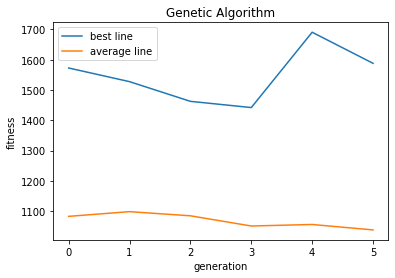

In [27]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
#     print(mutate1)
#     print(mutate2)
    while mutate2 == mutate1:
        mutate2 = randrange(0,25)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    return child        

def crossover(chromosome):
    for i in range(0,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        temp.fitness = fitnessFn(temp.chromosome)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
#         print(i.chromosome + ' ' + str(i.fitness))
    
    
#     return chromosome

def findProtein(chromosome):
    meal1 = chromosome[0:8]
    meal2 = chromosome[8:16]
    meal3 = chromosome[16:]
    return getData(meal1, 'protein') + getData(meal2, 'protein') + getData(meal3, 'protein')

def findCalories(chromosome):
    meal1 = chromosome[0:8]
    meal2 = chromosome[8:16]
    meal3 = chromosome[16:]
    return getData(meal1, 'calories') + getData(meal2, 'calories') + getData(meal3, 'calories')
    
# def checkConstraint(chromosome) :
#     protein = findProtein(chromosome)
#     if  protein >= 75 and protein <= 100:
        
#     else:
        
def fitnessFn(chromosome) :
    proteinCri = 0.5*findProtein(chromosome) 
    calCri = 0.5*findCalories(chromosome)
#     print('proteindCri: ' + str(proteinCri) + ' ' + 'calCri: ' + str(calCri))
    return proteinCri + calCri
    
def breeding(chromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        cms.fitness = fitnessFn(cms.chromosome)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
        
        
    
    
    
    
def findBestAndAve(chromosome):
    for i in chromosome:
        chromosome[i] = fitnessFn(chromosome[i])
    chromosome.sort(reverse = True)
    for j in chromosome:
        crossover(chromosome[j],chromosome[j+1])
    
def getData(chromosome, reqType):
    summ = 0
    for i in range(0,8):
        temp = int(chromosome[i])*(2**(7-i))
        summ = summ + temp
    start = summ + 1

    di = r"Filtered_Nutriton.csv"

    article_read = pandas.read_csv(di, encoding='latin1')
    
    if(reqType == 'name'):
        name = article_read.Item_Name[summ]
        print('name: ' + name)
        return name
    elif(reqType == 'category'):
        category = article_read.Food_Category[summ]
        print('category: ' + category)
        return category
    elif(reqType == 'serving'):
        serving = article_read.Serving_Size[summ]
        print('serving: ' + str(serving))
        return serving
    elif(reqType == 'calories'):
        calories = article_read.Calories[summ]
#         print('calories: ' + str(calories))
        return calories
    elif(reqType == 'totalfat'):
        totalfat = article_read.Total_Fat[summ]
        print('totalfat: '  + str(totalfat))
        return totalfat
    elif(reqType == 'saturatedfat'):
        saturatedfat = article_read.Saturated_Fat[summ]
        print('saturatedFat: ' + str(saturatedfat))
        return saturatedfat
    elif(reqType == 'transfat'):
        transfat = article_read.Trans_Fat[summ]
        print('transfat: ' + str(transfat))
        return transfat
    elif(reqType == 'cholesterol'):
        cholesterol = article_read.Cholesterol[summ]
        print('cholesterol: ' + str(cholesterol))
        return cholesterol
    elif(reqType == 'sodium'):
        sodium = article_read.Sodium[summ]
        print('sodium: ' + str(sodium))
        return sodium
    elif(reqType == 'carb'):
        carb = article_read.Carbohydrates[summ]
        print('carb: ' + str(carb))
        return carb
    elif(reqType == 'protein'):
        protein = article_read.Protein[summ]
#         print('protein: ' + str(protein))
        return protein
    elif(reqType == 'sugar'):
        sugar = article_read.Sugar[summ]
        print('sugar: ' + str(sugar))
        return sugar
    elif(reqType == 'fiber'):
        fiber = article_read.Dietary_Fiber[summ]
        print('fiber: ' + str(fiber))
        return fiber



chromosome = []
bestLn = []
avgLn = []

chromosome = create_chromosome(bestLn, avgLn)
gen = 0
for i in range(5):
    breeding(chromosome, bestLn, avgLn)
    gen = gen + 1
    print(bestLn)
    print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
print(bestLn)
print(avgLn)
print(genLn)
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 

# crossover(chromosome[0], chromosome[1])





